In [1]:
import pandas as pd

# Цель:
*Исследовать поведение пользователей в обновлённом приложении.*
# Задачи:
1) *Определить, насколько обучение сокращает время прохождения этапов игры.*
2) *Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.*
3) *Определить, насколько прозрачен процесс взаимодействия с игрой.* 

Для решения первой задачи прочитаем две таблицы - purhas и event. 

In [2]:
purhas = pd.read_csv('data/7_4_Purchase.csv')
display(purhas)

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100
...,...,...,...,...
5951,21625,87331,2020-07-06T09:02:07,50
5952,21626,87418,2020-07-06T14:16:37,100
5953,21627,87431,2020-07-06T22:48:59,50
5954,21628,87363,2020-07-07T05:38:56,100


In [3]:
event = pd.read_csv('data/7_4_Events.csv')
display(event)

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585
...,...,...,...,...,...,...
252329,281232,level_choice,hard,2020-07-02T10:02:15,NaN,87439
252330,281233,level_choice,medium,2020-07-02T11:38:52,NaN,87488
252331,281234,pack_choice,NaN,2020-07-02T11:42:14,NaN,87488
252332,281235,tutorial_start,NaN,2020-07-02T13:32:58,86127.0,87464


Переведем дату из объекта в дату и выберем пользователей с 01-01-2018 по 01-01-2019 с регистрацией. Затем выведем информацию таблицы. 

In [4]:
event['start_time']=pd.to_datetime(event['start_time'], errors='coerce')
mask_3=(event['start_time']>='2018-01-01') & (event['start_time']<'2019-01-01') & (event['event_type']=='registration')
nove_2018 = event[mask_3]['user_id'].to_list()
event = event[event['user_id'].isin(nove_2018)]
purhas['event_datetime'] = pd.to_datetime(purhas['event_datetime'], errors='coerce')
purhas=purhas[purhas['user_id'].isin(nove_2018)]
purhas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1600 non-null   int64         
 1   user_id         1600 non-null   int64         
 2   event_datetime  1600 non-null   datetime64[ns]
 3   amount          1600 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 62.5 KB


Выведем таблицу для наглядности. 

In [5]:
display(purhas)

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03 18:53:43,100
1172,16846,27865,2018-01-04 14:46:10,250
1174,16848,27911,2018-01-07 08:19:12,50
1175,16849,27910,2018-01-07 12:11:34,100
1176,16850,27940,2018-01-07 13:16:41,200
...,...,...,...,...
2767,18441,47498,2019-01-02 03:48:19,100
2768,18442,47647,2019-01-02 23:26:26,150
2769,18443,47554,2019-01-03 00:36:36,50
2774,18448,47742,2019-01-04 12:51:41,50


Переименуем стобцы чтобы соединить таблицы между собой

In [6]:
event = event.rename(columns={'id': 'event_id'})
purhas = purhas.rename(columns={'id':'purhas_id', 'event_datetime':'start_time'})

In [7]:
total_events_df = pd.concat([event, purhas], sort=False)
display(total_events_df)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purhas_id,amount
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
2767,NaN,NaN,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
2768,NaN,NaN,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
2769,NaN,NaN,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
2774,NaN,NaN,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


In [8]:
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')
total_events_df[total_events_df['event_type']=='tutorial_start']

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purhas_id,amount
7,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN
8,80316.0,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835,NaN,NaN
10,80318.0,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836,NaN,NaN
12,80320.0,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833,NaN,NaN
15,80323.0,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839,NaN,NaN
...,...,...,...,...,...,...,...,...
66934,147242.0,tutorial_start,NaN,2018-12-31 10:21:11,49550.0,47747,NaN,NaN
66943,147251.0,tutorial_start,NaN,2018-12-31 19:38:14,49551.0,47751,NaN,NaN
66945,147253.0,tutorial_start,NaN,2018-12-31 20:54:56,49552.0,47753,NaN,NaN
66952,147260.0,tutorial_start,NaN,2019-01-01 00:08:14,49553.0,47755,NaN,NaN


Затем сдлеаем копию total_events_df_2 таблицы для дальнейшего пользования. Для выполения первой задачи: определить, насколько обучение сокращает время прохождения этапов игры, решила взять tutorial_id, который указывает на событие,  которое есть только у пользователей совершивших обучения. Заменила пустые значения в столбце tutorial_id на 0. 

In [9]:
total_events_df_2 = total_events_df
total_events_df_2['tutorial_id']  = total_events_df_2['tutorial_id'].fillna(0)
display(total_events_df_2)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purhas_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,0.0,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,0.0,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,0.0,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,0.0,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,0.0,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,NaN,NaN,2019-01-02 03:48:19,0.0,47498,18441.0,100.0
68555,NaN,NaN,NaN,2019-01-02 23:26:26,0.0,47647,18442.0,150.0
68556,NaN,NaN,NaN,2019-01-03 00:36:36,0.0,47554,18443.0,50.0
68557,NaN,NaN,NaN,2019-01-04 12:51:41,0.0,47742,18448.0,50.0


Выбираем зачения tutorial_id больше 0, то есть отбираем пользователей, проходящих обучение. 

In [10]:
total_events_df_2 = total_events_df_2[total_events_df_2['tutorial_id']>0]
total_events_df_2['event_type'].nunique()

2

Уникальных пользователей кто начал обучение 11858

In [11]:
total_events_df_2[total_events_df_2['event_type']=='tutorial_start']['user_id'].nunique()

11858

Уникальных пользователей кто закончил обучение 10250. Можно предположить, что 1606 пользователей начали но не закончили обучение. 


In [12]:
total_events_df_2[total_events_df_2['event_type']=='tutorial_finish']['user_id'].nunique()

10250

Для определения времени я помещаю таблицу в новую копию, для того чтобы выбрать начало обучения. 

In [13]:
nachalo = total_events_df_2

In [14]:
nachalo = nachalo[nachalo['event_type']=='tutorial_start']
nachalo['user_id'].nunique()

11858

Один человек может начать обучение несколько раз поэтому избавимся от дубликатов и оставим первое обучение 

In [15]:
nachalo['user_id'].value_counts().mean()

1.522179119581717

In [16]:
nachalo_drop = nachalo.sort_values('start_time').drop_duplicates('user_id')
nachalo_drop['user_id'].value_counts().mean()

1.0

Проделаем все со следующей таблицей, выберем теперь тип события - завершения обучения. 

In [17]:
finish = total_events_df
finish = finish[finish['event_type']=='tutorial_finish']
finish = finish.rename(columns=({'start_time':'finish_time'}))
display(finish)

,event_id,event_type,selected_level,finish_time,tutorial_id,user_id,purhas_id,amount
9,80317.0,tutorial_finish,NaN,2018-01-01 15:06:15,31506.0,27835,NaN,NaN
11,80319.0,tutorial_finish,NaN,2018-01-01 15:42:58,31507.0,27836,NaN,NaN
13,80321.0,tutorial_finish,NaN,2018-01-01 17:50:08,31508.0,27833,NaN,NaN
16,80324.0,tutorial_finish,NaN,2018-01-01 19:16:32,31509.0,27839,NaN,NaN
18,80326.0,tutorial_finish,NaN,2018-01-01 19:48:01,31510.0,27834,NaN,NaN
...,...,...,...,...,...,...,...,...
66935,147243.0,tutorial_finish,NaN,2018-12-31 10:22:45,49550.0,47747,NaN,NaN
66944,147252.0,tutorial_finish,NaN,2018-12-31 19:39:34,49551.0,47751,NaN,NaN
66946,147254.0,tutorial_finish,NaN,2018-12-31 20:57:07,49552.0,47753,NaN,NaN
66953,147261.0,tutorial_finish,NaN,2019-01-01 00:09:30,49553.0,47755,NaN,NaN


In [18]:
finish['user_id'].value_counts().mean()

1.4540487804878048

In [19]:
finish_drop = finish.sort_values('finish_time').drop_duplicates('user_id')
finish_drop['user_id'].value_counts().mean()

1.0

Затем, объединим две таблицы с началом и концом обучения. Удалим лишние столбцы. 

In [20]:
merged_obychenie = finish_drop.merge(nachalo_drop, on = 'user_id', how = 'inner')
merged_obychenie = merged_obychenie[['user_id', 'tutorial_id_x', 'finish_time', 'start_time']].rename(columns={'tutorial_id_x': 'tutorial_id'})
display(merged_obychenie)

,user_id,tutorial_id,finish_time,start_time
0,27835,31506.0,2018-01-01 15:06:15,2018-01-01 15:00:51
1,27836,31507.0,2018-01-01 15:42:58,2018-01-01 14:54:40
2,27833,31508.0,2018-01-01 17:50:08,2018-01-01 17:47:40
3,27839,31509.0,2018-01-01 19:16:32,2018-01-01 19:11:36
4,27834,31510.0,2018-01-01 19:48:01,2018-01-01 19:46:11
...,...,...,...,...
10245,47747,49550.0,2018-12-31 10:22:45,2018-12-31 10:21:11
10246,47751,49551.0,2018-12-31 19:39:34,2018-12-31 19:38:14
10247,47753,49552.0,2018-12-31 20:57:07,2018-12-31 20:54:56
10248,47755,49553.0,2019-01-01 00:09:30,2019-01-01 00:08:14


Затем отфильтруем пользователей тез кто выбрал уровень сложности и выведем среднее количество пользователей 

In [21]:
total_events_df_3 = total_events_df
total_events_df_3 = total_events_df_3[total_events_df_3['event_type']=='level_choice']
total_events_df_3 = total_events_df_3[['user_id', 'start_time']].rename(columns={'start_time':'level_time'})
total_events_df_3['user_id'].value_counts().mean()

1.0

Соединяем таблицу тех кто прошел обучние и выбрал уровень сложности. находим что среднее время прохождения занимает 2 часа 19 минут и 47 секунд (за разницу взяла время конца обучения) Также стоит заметить что пользвоатели выбравшие выбор уровень сложности 7501 можно сравнить с теми кто выбрал уровень вопросов 

In [22]:
merged_obychenie_level = total_events_df_3.merge(merged_obychenie, on = 'user_id', how='inner')
merged_obychenie_level['delta_time_level'] = merged_obychenie_level['level_time'] - merged_obychenie_level['finish_time']
merged_obychenie_level['delta_time_level'].describe()

count                         7501
mean     0 days 02:19:46.959472070
std      0 days 01:25:02.559683474
min                0 days 00:00:58
25%                0 days 01:09:02
50%                0 days 02:14:22
75%                0 days 03:24:32
max                0 days 06:36:45
Name: delta_time_level, dtype: object

Проделаем тоже самое только возьмем этап pack_choice - выбор пакета возможностей 

In [23]:
total_events_df_4 = total_events_df
total_events_df_4 = total_events_df_4[total_events_df_4['event_type']=='pack_choice']
total_events_df_4 = total_events_df_4[['user_id', 'start_time']].rename(columns={'start_time':'pack_time'})
total_events_df_4['user_id'].value_counts().mean()


1.0

Средняя игра между прохождением обучения и выбора пакета вопросов составила 2 часа 24 минут 3 секунды и пользователей кто выбрал 5176 

In [24]:
merged_obychenie_pack = total_events_df_4.merge(merged_obychenie, on = 'user_id', how='inner')
merged_obychenie_pack['delta_time_pack'] = merged_obychenie_pack['pack_time'] - merged_obychenie_pack['finish_time']
merged_obychenie_pack['delta_time_pack'].describe()


count                         5176
mean     0 days 02:24:02.275309119
std      0 days 01:24:46.566652324
min                0 days 00:03:19
25%                0 days 01:13:45
50%         0 days 02:18:51.500000
75%         0 days 03:29:30.250000
max                0 days 06:33:17
Name: delta_time_pack, dtype: object

Теперь можем найти тех кто выбрал и уровень сложности и пакет вопросов. Итак пользователи кто выбрал пакет вопросов и выбрали сложный уровень. Между ними разница 5 минут и 18 секунд, но изначально те кто прошли обучения 10250 а осталось 5176, из них 2325 выбрали уровень сложности но не пошли дальше и 2749 не стали дальше играть после обучения

In [25]:
merged_obychenie_pack_level = merged_obychenie_level.merge(merged_obychenie_pack, on = 'user_id', how='inner')
merged_obychenie_pack_level['delta_time_level_pack'] = merged_obychenie_pack_level['delta_time_pack'] - merged_obychenie_pack_level['delta_time_level']
merged_obychenie_pack_level['delta_time_level_pack'].describe()

count                         5176
mean     0 days 00:05:18.146058732
std      0 days 00:02:44.449118501
min                0 days 00:00:19
25%                0 days 00:03:05
50%                0 days 00:04:58
75%                0 days 00:07:11
max                0 days 00:15:48
Name: delta_time_level_pack, dtype: object

In [26]:
r = merged_obychenie.merge(merged_obychenie_level, on='user_id', how='left')

Объединила все таблицы в одну,  и вывела недостающие данные.

In [27]:
merged_total = r.merge(merged_obychenie_pack, on='user_id', how = 'left')
merged_total = merged_total[['user_id', 'start_time_x', 'finish_time_x', 'level_time', 'delta_time_level', 'pack_time', 'delta_time_pack', 'tutorial_id_x']].rename(columns={'start_time_x':'start_time', 'finish_time_x':'finish_time'})
merged_total['delta_time_obychenue'] = merged_total['finish_time'] - merged_total['start_time']
merged_total['delta_time_pack_level'] = merged_total['pack_time'] - merged_total['level_time']
merged_total.describe()

,user_id,start_time,finish_time,level_time,delta_time_level,pack_time,delta_time_pack,tutorial_id_x,delta_time_obychenue,delta_time_pack_level
count,10250.000000,10250,10250,7501,7501,5176,5176,10250.000000,10250,5176
mean,37775.738244,2018-07-03 03:56:00.726926848,2018-07-03 04:08:14.550049024,2018-07-04 04:02:24.671243776,0 days 02:19:46.959472070,2018-07-04 18:49:00.088098816,0 days 02:24:02.275309119,40555.707805,0 days 00:12:13.823121951,0 days 00:05:18.146058732
min,27833.000000,2018-01-01 14:54:40,2018-01-01 15:06:15,2018-01-01 20:37:22,0 days 00:00:58,2018-01-01 20:38:43,0 days 00:03:19,31506.000000,0 days 00:00:16,0 days 00:00:19
25%,32828.500000,2018-03-24 02:51:17,2018-03-24 02:54:59.750000128,2018-03-24 13:47:36,0 days 01:09:02,2018-03-25 02:24:08.500000,0 days 01:13:45,35995.250000,0 days 00:02:31,0 days 00:03:05
50%,37669.500000,2018-06-23 09:59:01.500000,2018-06-23 10:33:52,2018-06-23 20:18:59,0 days 02:14:22,2018-06-25 20:19:02.500000,0 days 02:18:51.500000,40549.500000,0 days 00:03:49,0 days 00:04:58
75%,42774.750000,2018-10-12 19:57:50.750000128,2018-10-12 20:02:29.750000128,2018-10-14 04:29:37,0 days 03:24:32,2018-10-15 17:27:23,0 days 03:29:30.250000,45176.750000,0 days 00:05:19,0 days 00:07:11
max,47756.000000,2019-01-01 03:26:18,2019-01-01 03:29:25,2019-01-01 05:42:11,0 days 06:36:45,2019-01-01 05:50:36,0 days 06:33:17,49554.000000,0 days 18:54:29,0 days 00:15:48
std,5760.669397,NaN,NaN,NaN,0 days 01:25:02.559683474,NaN,0 days 01:24:46.566652324,5229.857848,0 days 01:01:28.012188068,0 days 00:02:44.449118501


Теперь приступим к пользователям кто не выбрал обучение или начал обучение но не прошел его 

In [28]:
all_users = set(total_events_df['user_id'].unique()) 
users_start = set(total_events_df[total_events_df['event_type']=='tutorial_start']['user_id'].unique())
users_not_start = all_users.difference(users_start)
users_finish = set(total_events_df[total_events_df['event_type']=='tutorial_finish']['user_id'].unique())
users_not_finish = users_start.difference(users_finish)


Для начала вставлю тех пользователей кто не начал обучение и создам новую таблицу с дельтами. 

In [29]:
total_1 = total_events_df
total_1 = total_1[total_1['user_id'].isin(all_users)]
total_1 = total_1[total_1['user_id'].isin(users_not_start)]
merded_not_start = total_1.pivot_table(
    values='start_time', 
    index='user_id', 
    columns='event_type', 
    aggfunc='min'
)
merded_not_start['delta_reg_level'] = merded_not_start['registration'] - merded_not_start['registration']
merded_not_start['delta_reg_pack'] = merded_not_start['pack_choice'] - merded_not_start['pack_choice']
print('Среднее значение между регистрацией и выбора уровня сложности, без обучения=', merded_not_start['delta_reg_level'].describe())
print('Среднее значение между регистрацией и выбора пакетов вопросов, без обучения=', merded_not_start['delta_reg_pack'].describe())

Среднее значение между регистрацией и выбора уровня сложности, без обучения= count               8068
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: delta_reg_level, dtype: object
Среднее значение между регистрацией и выбора пакетов вопросов, без обучения= count                 74
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
Name: delta_reg_pack, dtype: object


Затем тех, кто начад обучение, но не прошел его 

In [30]:
total_2 = total_events_df
total_2 = total_2[total_2['user_id'].isin(all_users)]
total_2 = total_2[total_2['user_id'].isin(users_start)]
total_2 = total_2[total_2['user_id'].isin(users_not_finish)]
merded_not_finish = total_2.pivot_table(
    values='start_time', 
    index='user_id', 
    columns='event_type', 
    aggfunc='min'
)
merded_not_finish.drop('registration', axis=1)
merded_not_finish['delta_start_not_finish_level'] = merded_not_finish['level_choice'] - merded_not_finish['tutorial_start']
merded_not_finish['delta_start_not_finish_pack'] = merded_not_finish['pack_choice'] - merded_not_finish['tutorial_start']
merded_not_finish['delta_start_not_finish_pack_level'] = merded_not_finish['pack_choice'] - merded_not_finish['level_choice']
print('Среднее время от начала обучения до выбора уровня сложности, не закончив обучение = ', merded_not_finish['delta_start_not_finish_level'].describe())
print('Среднее время от начала обучения до выбора пактов вопросов, не закончив обучение = ', merded_not_finish['delta_start_not_finish_pack'].describe())
print('Среднее время от выбора пакетов вопросов до выбора уровней сложностей, не закончив обучение = ', merded_not_finish['delta_start_not_finish_pack_level'].describe())


Среднее время от начала обучения до выбора уровня сложности, не закончив обучение =  count                          743
mean     0 days 02:47:28.088829071
std      0 days 01:42:58.752826263
min                0 days 00:02:05
25%                0 days 01:27:58
50%                0 days 02:42:43
75%         0 days 04:01:45.500000
max                0 days 07:08:18
Name: delta_start_not_finish_level, dtype: object
Среднее время от начала обучения до выбора пактов вопросов, не закончив обучение =  count                          487
mean     0 days 02:48:16.611909650
std      0 days 01:42:30.521512842
min                0 days 00:04:11
25%         0 days 01:30:22.500000
50%                0 days 02:43:19
75%         0 days 04:01:32.500000
max                0 days 07:11:55
Name: delta_start_not_finish_pack, dtype: object
Среднее время от выбора пакетов вопросов до выбора уровней сложностей, не закончив обучение =  count                          487
mean     0 days 00:05:05.295687885
std    

Присоединяю таблицы без потери данных обеих таблиц. 

In [31]:
merget_total_not = pd.concat([merded_not_finish, merded_not_start])
display(merget_total_not)

event_type,level_choice,pack_choice,registration,tutorial_start,delta_start_not_finish_level,delta_start_not_finish_pack,delta_start_not_finish_pack_level,delta_reg_level,delta_reg_pack
user_id,,,,,,,,,
27840,2018-01-02 05:18:42,NaT,2018-01-01 20:53:21,2018-01-02 02:07:07,0 days 03:11:35,NaT,NaT,NaT,NaT
27856,2018-01-03 08:31:35,2018-01-03 08:33:35,2018-01-02 21:18:21,2018-01-03 04:36:55,0 days 03:54:40,0 days 03:56:40,0 days 00:02:00,NaT,NaT
27857,NaT,NaT,2018-01-02 21:25:30,2018-01-03 07:18:57,NaT,NaT,NaT,NaT,NaT
27859,2018-01-03 01:11:45,NaT,2018-01-02 21:30:27,2018-01-02 21:37:44,0 days 03:34:01,NaT,NaT,NaT,NaT
27865,2018-01-04 05:56:32,2018-01-04 06:03:20,2018-01-03 11:14:57,2018-01-03 23:30:17,0 days 06:26:15,0 days 06:33:03,0 days 00:06:48,NaT,NaT
...,...,...,...,...,...,...,...,...,...
47749,NaT,NaT,2018-12-31 12:03:59,NaT,NaT,NaT,NaT,0 days,NaT
47750,NaT,NaT,2018-12-31 13:42:40,NaT,NaT,NaT,NaT,0 days,NaT
47752,NaT,NaT,2018-12-31 18:49:30,NaT,NaT,NaT,NaT,0 days,NaT


In [32]:
import matplotlib.pyplot as plt

Вычисляю среднее время с каждой таблицы (прошли обучение, не прошли обучение)

In [33]:
table_delta = merget_total_not[['delta_start_not_finish_level', 'delta_start_not_finish_pack', 'delta_start_not_finish_pack_level', 'delta_reg_level', 'delta_reg_pack']]
print('Среднее время начавших обучение от выбора уровня сложности, но не закончивших обучение', table_delta['delta_start_not_finish_level'].mean())
print('Среднее время начавших обучение от выбора пакета вопросов, но не закончивших обучение',table_delta['delta_start_not_finish_pack'].mean())
print('Среднее время между выбором уровня сложности и выбором пакетов вопросов',table_delta['delta_start_not_finish_pack_level'].mean())
print('Среднее время между регистрацией и выбором уровня сложности',table_delta['delta_reg_level'].mean())
print('Среднее время между регистрацией и выбором пакетов вопросов',table_delta['delta_reg_pack'].mean())

Среднее время начавших обучение от выбора уровня сложности, но не закончивших обучение 0 days 02:47:28.088829071
Среднее время начавших обучение от выбора пакета вопросов, но не закончивших обучение 0 days 02:48:16.611909650
Среднее время между выбором уровня сложности и выбором пакетов вопросов 0 days 00:05:05.295687885
Среднее время между регистрацией и выбором уровня сложности 0 days 00:00:00
Среднее время между регистрацией и выбором пакетов вопросов 0 days 00:00:00


In [34]:
table_delta_start = merged_total[['delta_time_level', 'delta_time_pack', 'delta_time_obychenue', 'delta_time_pack_level']]
print('Среднее зачение между концом обучения и выбором уровня сложности', table_delta_start['delta_time_level'].mean())
print('Среднее зачение между концом обучения и выбором пакета вопросов', table_delta_start['delta_time_pack'].mean())
print('Среднее время обучения', table_delta_start['delta_time_obychenue'].mean())
print('Среднее время между выбором уровня сложности и выбором пакета услуг',table_delta_start['delta_time_pack_level'].mean())


Среднее зачение между концом обучения и выбором уровня сложности 0 days 02:19:46.959472070
Среднее зачение между концом обучения и выбором пакета вопросов 0 days 02:24:02.275309119
Среднее время обучения 0 days 00:12:13.823121951
Среднее время между выбором уровня сложности и выбором пакета услуг 0 days 00:05:18.146058732


Затем создаю новую таблицу для построения столбчатой диаграммы, перевела время в секунды 

In [35]:
populations = pd.DataFrame([
    ['начатое обучение - выбор уровня сложности', 10048, 'начали обучение, не закончили'],
    ['начатое обучение - выбор пакетов вопросов', 10096, 'начали обучение, не закончили'],
    ['начатое обучение - выбор уровня сложности - выбор пакетов вопросов', 305, 'начали обучение, не закончили'],
    ['регистрация - выбор уровня сложности', 0, 'не начали обучение'],
    ['регистрация - выбор пакетов вопросов', 0, 'не начали обучение'], 
    ['закончили - выбор уровня сложности', 8387, 'закончили обучение'], 
    ['закончили - выбор пакетов вопросов', 8642, 'закончили обучение'], 
    ['начали - закончили', 734, 'закончили обучение'], 
    ['закончили - выбор уровня сложности - выбор пакетов вопросов', 318, 'закончили обучение']
    ],
    columns=['event_type', 'delta_second', 'statys']
)
display(populations)

,event_type,delta_second,statys
0,начатое обучение - выбор уровня сложности,10048,"начали обучение, не закончили"
1,начатое обучение - выбор пакетов вопросов,10096,"начали обучение, не закончили"
2,начатое обучение - выбор уровня сложности - вы...,305,"начали обучение, не закончили"
3,регистрация - выбор уровня сложности,0,не начали обучение
4,регистрация - выбор пакетов вопросов,0,не начали обучение
5,закончили - выбор уровня сложности,8387,закончили обучение
6,закончили - выбор пакетов вопросов,8642,закончили обучение
7,начали - закончили,734,закончили обучение
8,закончили - выбор уровня сложности - выбор пак...,318,закончили обучение


<Axes: title={'center': 'Зависимость прохождения обучения от средней скорости прохождения этапов игры'}, xlabel='Группы пользователей', ylabel='Срдняя скорость прохождения этапов, секунды'>

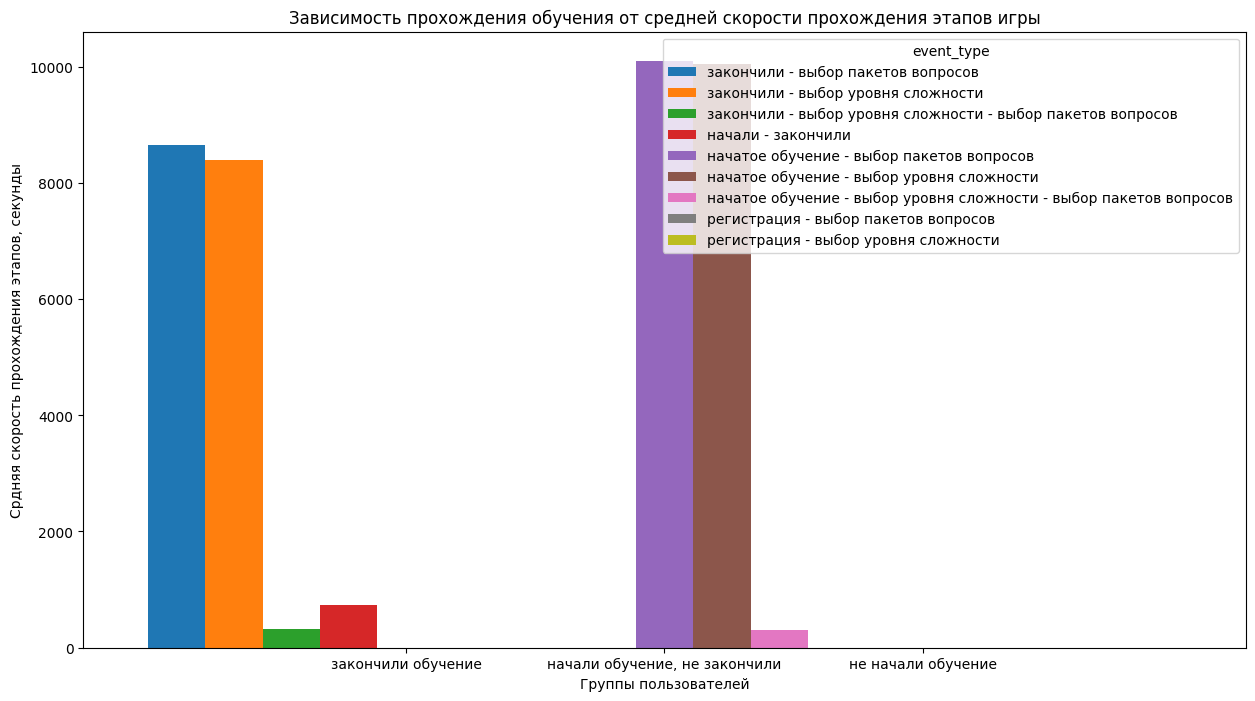

In [36]:
p = populations.pivot_table(
    values='delta_second', 
    columns='event_type', 
    index='statys', 
    )
p.plot(kind='bar',  
      figsize=(15,8), 
      rot=0, 
      width=2, 
      title = 'Зависимость прохождения обучения от средней скорости прохождения этапов игры', 
      xlabel='Группы пользователей', 
      ylabel='Срдняя скорость прохождения этапов, секунды')

### Вопрос второй: 
* Докажите, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

### Ответ:

* Время прохождения обучения проходит быстро, пользователь завершает и с большей вероятностью выбирает другие этапы игры и судя по диаграмме идет играть дальше (выбор уровня сложности и пакетов вопросов)


* Что можно сказать о тех, кто начал но сразу перешел на следующие уровни, не закончив обучение, данные пользователи проходят игру дольше, видимо, поняв обучение сразу могут приступать к игре, и затем выбирать другой уровень.


* Пользователи, которые не стали проходить обучение и не стали дальше играть, можно предположить что пользователь зарегистрировался просто так, не приступив к игре.


* Итак, не намного больше средняя скорость прохождения у пользователей, кто не стал проходить обучения до конца, главное, что пользователи интересуются и выбирают дальше этапы. Можно сделать вывод, что пользователи прошедшие обучение проходят игру быстрее

Для начала к таблице с оплатой внесу столбец с оплатой,  а затем соединю с первой таблицей 

In [37]:
purhas['event_type'] = 'purchase'
total_events_purhas = pd.concat([event, purhas], sort=False)
total_events_purhas= total_events_purhas.reset_index(drop=True).sort_values('start_time')
display(total_events_purhas)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purhas_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


Создам новую таблицу, можно посмотреть точно ли пользователи начинали обучение больше одного раза, из таблицы можно вынести что максимальное число начатых обучений 9 раз

In [38]:
table_purhas = total_events_purhas.pivot_table(
 index='user_id', 
 columns='event_type', 
 values='start_time', 
 aggfunc='count')
table_purhas['tutorial_start'].describe()


count    11858.000000
mean         1.522179
std          1.347414
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: tutorial_start, dtype: float64

Сделаю копию таблицы и избавлюсь от ненужных данных.

In [39]:
table_purhas_1 = table_purhas
table_purhas_1=table_purhas_1[['purchase', 'tutorial_start']]
display(table_purhas_1)

event_type,purchase,tutorial_start
user_id,,
27832,NaN,NaN
27833,NaN,1.0
27834,NaN,1.0
27835,NaN,1.0
27836,NaN,2.0
...,...,...
47753,NaN,1.0
47754,NaN,NaN
47755,NaN,1.0


Оставим только тех, у кого была произведена оплата и кто начал обучение

In [40]:
mask_4 = (table_purhas_1['purchase']>0) & (table_purhas_1['tutorial_start']>0)
table_purhas_1 = table_purhas_1[mask_4]
display(table_purhas_1)

event_type,purchase,tutorial_start
user_id,,
27845,1.0,2.0
27865,1.0,1.0
27884,1.0,3.0
27910,1.0,1.0
27911,1.0,1.0
...,...,...
47671,1.0,1.0
47687,1.0,1.0
47712,1.0,1.0


Видим что оплата была произведена только один раз а количество начавших обучение больше 1. 

In [41]:
table_purhas_1.describe()

event_type,purchase,tutorial_start
count,1578.0,1578.000000
mean,1.0,1.534221
std,0.0,1.380325
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,9.000000


Группирую данные чтобы посмотреть, есть ли дубликаты в пользователях.

In [42]:
table_purhas_1.groupby('user_id')['tutorial_start'].sum()

user_id
27845    2.0
27865    1.0
27884    3.0
27910    1.0
27911    1.0
        ... 
47671    1.0
47687    1.0
47712    1.0
47732    1.0
47742    1.0
Name: tutorial_start, Length: 1578, dtype: float64

Затем найду тех, кто прошел обучение до конца, для этого я оставляю данные с оплатой с стартом и концом обучения. Затем фильтру значения больше 0 и оставляю только тех у кого количество начатого обучение и завершенного совпадают. 

In [43]:
table_purhas_2 = table_purhas
table_purhas_2=table_purhas_2[['purchase', 'tutorial_start', 'tutorial_finish']]
mask_5=(table_purhas_2['purchase']>0) & (table_purhas_2['tutorial_start']>0) & (table_purhas_2['tutorial_finish']>0) 
mask_6 = table_purhas_2['tutorial_finish']==table_purhas_2['tutorial_start']
table_purhas_2 = table_purhas_2[mask_5]
table_purhas_2 = table_purhas_2[mask_6]
display(table_purhas_2)

C:\Users\Pavel\AppData\Local\Temp\ipykernel_10572\2983421365.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_purhas_2 = table_purhas_2[mask_6]


event_type,purchase,tutorial_start,tutorial_finish
user_id,,,
27845,1.0,2.0,2.0
27910,1.0,1.0,1.0
27940,1.0,1.0,1.0
27969,1.0,1.0,1.0
27977,1.0,1.0,1.0
...,...,...,...
47671,1.0,1.0,1.0
47687,1.0,1.0,1.0
47712,1.0,1.0,1.0


Затем смотрю на среднее количество, чтобы оплата была 1 а среднее начатого и завершенного обучения были одинаковы. 

In [44]:
table_purhas_2.describe()

event_type,purchase,tutorial_start,tutorial_finish
count,1301.0,1301.000000,1301.000000
mean,1.0,1.282859,1.282859
std,0.0,0.877894,0.877894
min,1.0,1.000000,1.000000
25%,1.0,1.000000,1.000000
50%,1.0,1.000000,1.000000
75%,1.0,1.000000,1.000000
max,1.0,9.000000,9.000000


Проверяем на дубликаты

In [45]:
table_purhas_2.groupby('user_id')['tutorial_start'].sum()

user_id
27845    2.0
27910    1.0
27940    1.0
27969    1.0
27977    1.0
        ... 
47671    1.0
47687    1.0
47712    1.0
47732    1.0
47742    1.0
Name: tutorial_start, Length: 1301, dtype: float64

Соединяем таблицы 

In [46]:
total_table_purchase = table_purhas_1.merge(table_purhas_2, on='user_id', how='left')
total_table_purchase =total_table_purchase.rename(columns={'purchase_x':'purchase_nachalo', 'tutorial_start_x':'tutorial_nachalo', 'purchase_y': 'purchase_finish', 'tutorial_start_y': 'tutorial_start_finish', })
display(total_table_purchase)

event_type,purchase_nachalo,tutorial_nachalo,purchase_finish,tutorial_start_finish,tutorial_finish
user_id,,,,,
27845,1.0,2.0,1.0,2.0,2.0
27865,1.0,1.0,NaN,NaN,NaN
27884,1.0,3.0,NaN,NaN,NaN
27910,1.0,1.0,1.0,1.0,1.0
27911,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
47671,1.0,1.0,1.0,1.0,1.0
47687,1.0,1.0,1.0,1.0,1.0
47712,1.0,1.0,1.0,1.0,1.0


Проверяем не было ли потери данных.

In [47]:
total_table_purchase.describe()

event_type,purchase_nachalo,tutorial_nachalo,purchase_finish,tutorial_start_finish,tutorial_finish
count,1578.0,1578.000000,1301.0,1301.000000,1301.000000
mean,1.0,1.534221,1.0,1.282859,1.282859
std,0.0,1.380325,0.0,0.877894,0.877894
min,1.0,1.000000,1.0,1.000000,1.000000
25%,1.0,1.000000,1.0,1.000000,1.000000
50%,1.0,1.000000,1.0,1.000000,1.000000
75%,1.0,1.000000,1.0,1.000000,1.000000
max,1.0,9.000000,1.0,9.000000,9.000000


Группирую данные по количествам пользователей от количества обучений и строю диаграмму 

Text(0.5, 1.0, 'Количество завершенных обучений')

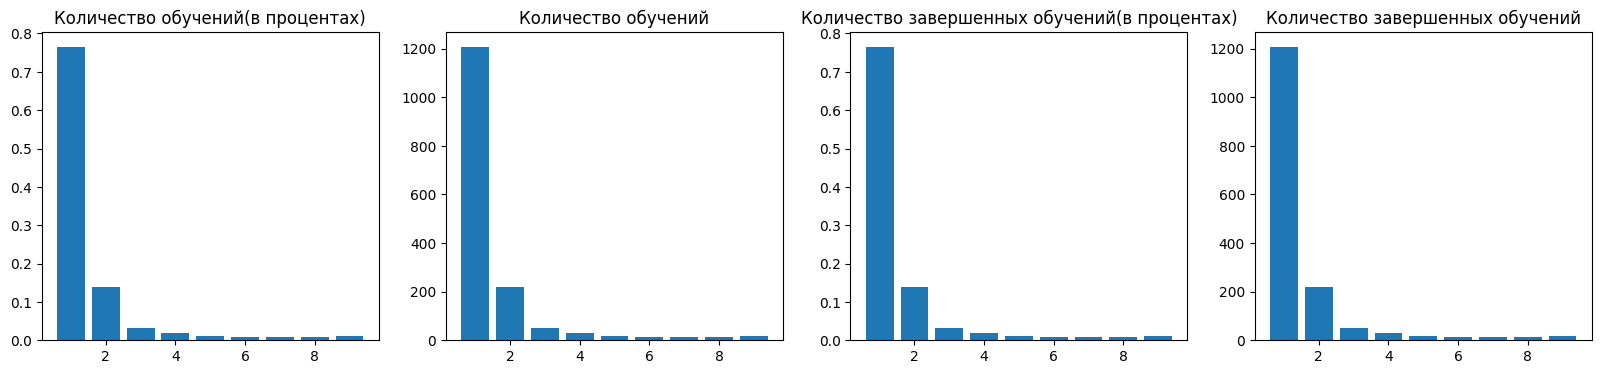

In [48]:
t_2 = total_table_purchase
t_2 = t_2[['tutorial_nachalo', 'tutorial_finish']]
v_1 = t_2['tutorial_nachalo'].value_counts(normalize=True)
v_2 = t_2['tutorial_nachalo'].value_counts()
v_3 = t_2['tutorial_nachalo'].value_counts(normalize=True)
v_4 = t_2['tutorial_nachalo'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
axes[0].bar(x=v_1.index, 
    height=v_1, 
    )
axes[0].set_title('Количество обучений(в процентах)')
axes[1].bar(
    x=v_2.index, 
     height=v_2
)
axes[1].set_title('Количество обучений')
axes[2].bar(
    x=v_3.index, 
     height=v_3)
axes[2].set_title('Количество завершенных обучений(в процентах)')
axes[3].bar(
    x=v_4.index, 
     height=v_4)
axes[3].set_title('Количество завершенных обучений')

Я построила зависимость количества пользователей от колчичества обучений.

Что можно сказать исследуя наши диаграммы. Оплата не зависит от количества обучений, пользователи с первого прохождения приступают к оплате, однако можно заметить, что и со второго обучения пользователей немало. 

Хочу заметить, что покупателей, кто начал обучение, но не завершил его больше на 277 клиента. Видимо, игра им нравилась уже с момента обучения и они приступали к оплате, что является хорошим результатом

Далее я хочу рассмотреть, есть ли покупатели среди тех, кто не прошел обучение. Для этого беру готовую таблицу и отфильтровываю чтобы не было старта обучения

In [49]:
total_events_purhas_not_start = total_events_purhas
total_events_purhas_not_start['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

In [50]:
table_purhas_not_start = total_events_purhas_not_start.pivot_table(
 index='user_id', 
 columns='event_type', 
 values='start_time', 
 aggfunc='count')
table_purhas_not_start.describe()

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
count,8342.0,5737.0,1600.0,19926.0,10250.000000,11858.000000
mean,1.0,1.0,1.0,1.0,1.454049,1.522179
std,0.0,0.0,0.0,0.0,1.174287,1.347414
min,1.0,1.0,1.0,1.0,1.000000,1.000000
25%,1.0,1.0,1.0,1.0,1.000000,1.000000
50%,1.0,1.0,1.0,1.0,1.000000,1.000000
75%,1.0,1.0,1.0,1.0,1.000000,1.000000
max,1.0,1.0,1.0,1.0,9.000000,9.000000


Убираем старт обучения и видим что количество пользователей, кто не прошел обучение, но купил всего 22, а тех кто прошел обучение 1578, разница огромная.

In [51]:
table_purhas_not_start['tutorial_start'] = table_purhas_not_start['tutorial_start'].fillna(0)
table_purhas_not_start = table_purhas_not_start[table_purhas_not_start['tutorial_start']==0]
table_purhas_not_start['purchase'].describe()


count    22.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: purchase, dtype: float64

Построим график зависимость количества покупателей прошедших обечение, тех, кто совершил покупку, от тех кто не проходил обучение.

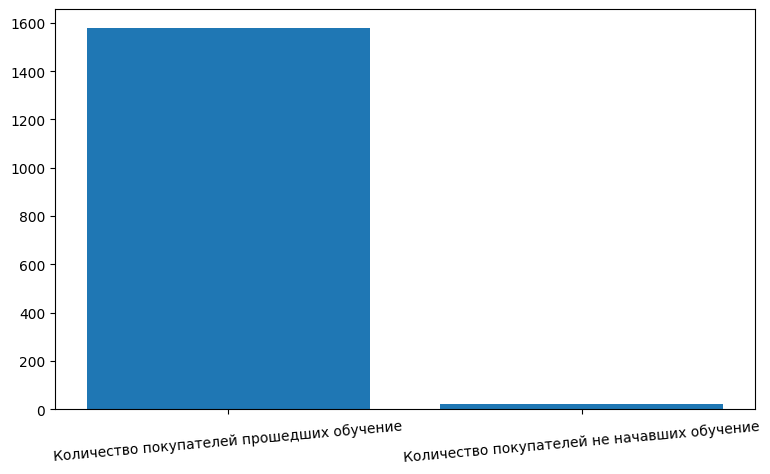

In [52]:
names = ['Количество покупателей прошедших обучение', 'Количество покупателей не начавших обучение']
values = [1578, 22]
fig= plt.figure(figsize=(7, 4))
axes = fig.add_axes([2, 2,1, 1]) 
axes.bar(names, values)
axes.xaxis.set_tick_params(rotation=5)
plt.show()

### Ответ: 
* Количество обучений не зависит от оплаты. Пользователи покупают с первого прохождения обучения. Это хороший знак, потому что показывает, как пользователям понятен материал и как они заинтересованы в покупке. Однако, можно заметить, что есть и покупатели кто проходил обучение несколько раз, и количество пользователей кстати больше даже тех, кто не начинал обучаться. 

* Также можно сделать вывод, что количество покупателей, кто прошел обучение (или начал, но не завершил его) гораздо больше, это указывает на эффективность обучения. 

### Вопрос 3 

* Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

Для начала я создаю таблицу тех пользователей, кто выбрал уровень сложности и начало обучения (начало обучения беру таблицу из 1 вопроса), и объединяю их. Привожу таблицу в красивый вид и ищу дельту

In [53]:
start_level = total_events_df
start_level= start_level[start_level['event_type']=='level_choice']
start_level_table = nachalo.merge(start_level, on='user_id', how='left')
start_level_table =start_level_table[['start_time_x', 'user_id', 'start_time_y']].rename(columns={'start_time_x':'start_time', 'start_time_y': 'level_time'})
start_level_table['dt_level'] = start_level_table['level_time'] - start_level_table['start_time']
display(start_level_table)

,start_time,user_id,level_time,dt_level
0,2018-01-01 14:54:40,27836,NaT,NaT
1,2018-01-01 15:00:51,27835,2018-01-01 20:37:22,0 days 05:36:31
2,2018-01-01 15:40:43,27836,NaT,NaT
3,2018-01-01 17:47:40,27833,NaT,NaT
4,2018-01-01 19:11:36,27839,2018-01-01 22:37:50,0 days 03:26:14
...,...,...,...,...
18045,2018-12-31 10:21:11,47747,2018-12-31 12:24:40,0 days 02:03:29
18046,2018-12-31 19:38:14,47751,NaT,NaT
18047,2018-12-31 20:54:56,47753,2018-12-31 22:36:19,0 days 01:41:23
18048,2019-01-01 00:08:14,47755,2019-01-01 05:04:52,0 days 04:56:38


Ищу уникальных пользователей кто сначала выбрал уровень сложности, а потом начал обучение.

In [54]:
start_level_table[start_level_table['dt_level']<pd.Timedelta(0)]['user_id'].nunique()

1386

Ищу уникальных пользователей кто сначала прошел обучение, а затем выбрал уровень сложности.

In [55]:
start_level_table[start_level_table['dt_level']>'1 second']['user_id'].nunique()

8244

Найдем уникальных пользователей

In [56]:
start_level_table['user_id'].nunique()

11858

Посчитаю сразу в процентах

In [57]:
a = 8244
b= 1386
c = 11858
print('Процент прошедших сразу уровень сложности', a/c)
print('Процент вернувшихся за обучением', b/c)

Процент прошедших сразу уровень сложности 0.6952268510710069
Процент вернувшихся за обучением 0.11688311688311688


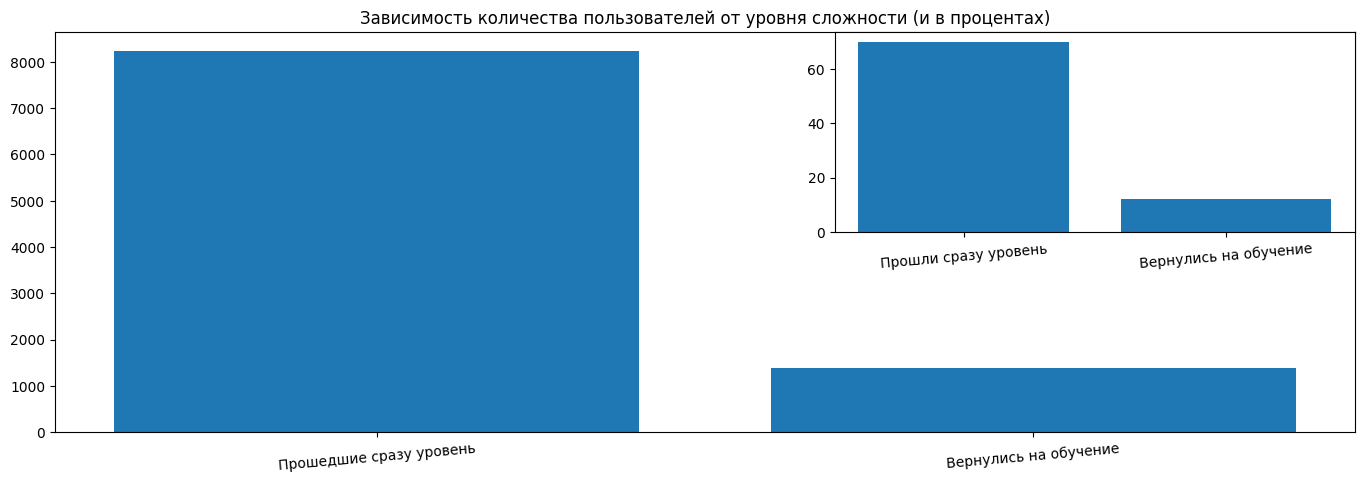

In [58]:
names_1 = ['Прошедшие сразу уровень', 'Вернулись на обучение']
values_1 = [8234, 1386]
fig= plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1]) 
axes.bar(names_1, values_1)
axes.xaxis.set_tick_params(rotation=5)
axes.set_title('Зависимость количества пользователей от уровня сложности (и в процентах)')
names_1 = ['Прошли сразу уровень', 'Вернулись на обучение']
values_1 = [70, 12]
##fig= plt.figure(figsize=(7, 4))
axes = fig.add_axes([0.6, 0.5, 0.4, 0.5]) 
axes.bar(names_1, values_1)
axes.xaxis.set_tick_params(rotation=5)


### Ответ:

* В основном пользователи проходили обучение сразу же и не возвращались к началу, это означает, что обучение понятно и сразу вернемся к вопросу второму, что большинство пользователей приступили к покупке после обучение. Это доказывает правильной подачи материала. Только 12% вернулись на обучение, возможно, стоит еще рассмотреть 'а проходили ли обучение?' или сразу же перешли на уровень. Так точно можно предположить в чем дело. 

### Подводим итоги:

* По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

Обучение действительно сокращает время прохождения на другие этапы игры.

* Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

 Утверждать обратное не стану, пользователи действительно могут проходить несколько раз обучение и при этом совершить оплату, но в основном достаточно и одного прохождения

* Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

Показатель выдал, что будет проходить заново обучение. Но исходя из математического рассчета процент вернувшихся 12% а процент не вернувшихся 18%. Не такая уж большая разница. Стоит сделать акцент, что около 70% прошли уровень сложности, это еще раз доказывает эффективное обучение. 